<a href="https://colab.research.google.com/github/akashsinghsharma/Time-Series/blob/main/25_Time_Series_Upsampling_and_Downsampling_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = '/content/drive/MyDrive/Data Science/Time Series/Data/us-airlines-monthly-aircraft-miles-flown.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


## Downsampling

In [5]:
quat_df = df.resample('Q' , on = 'Month').mean() # Q stands for quaterly, here we are downsampling from days -> quarter. Mean is used to summarise.
quat_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [6]:
yearly_df = df.resample('A' , on = 'Month').sum() # A stands for annual
yearly_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### Alias list

```
B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds
```

Note - We can also use group by function instead of resample, but this is faster.

In [7]:
group_df = df.copy()

group_df['Year'] = group_df['Month'].dt.year
group_df.head()

,Month,MilesMM,Year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [8]:
group_df.groupby('Year')['MilesMM'].mean()

,MilesMM
Year,
1963,8300.250000
1964,8849.333333
1965,9619.250000
1966,9929.500000
1967,10542.916667
1968,10747.916667
1969,11972.000000
1970,13124.750000


## Upsampling

In [9]:
upsampled_df = df.resample('D' , on = 'Month').mean()
upsampled_df.head(30) ## Here only structure will be created for daily data, miles column will be zero.

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


One easy way here is to build a linear line in between two month's first date. Menas just keep increasing value equally till it reaches value of next month.

In [10]:
interpolated_miles = upsampled_df.interpolate(method= 'linear')
interpolated_miles.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

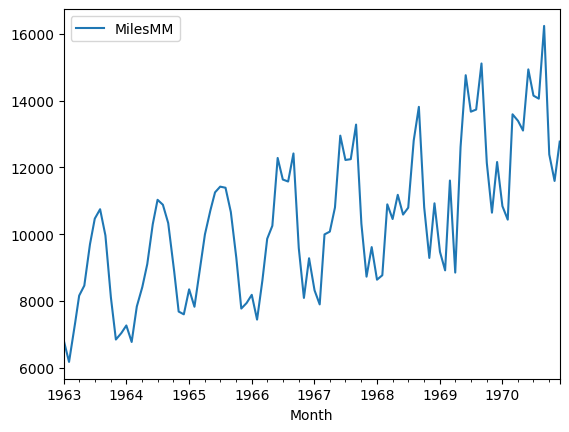

In [12]:
interpolated_miles.plot()

<Axes: xlabel='Month'>

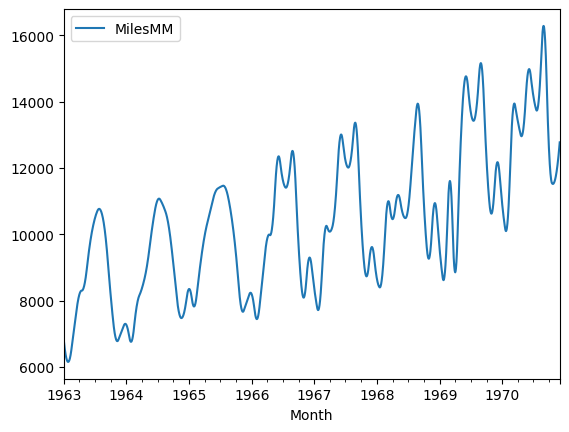

In [13]:
poly_interpolated_function = upsampled_df.interpolate(method='spline' , order = 2)
poly_interpolated_function.plot() ## Notice the absence of sharpt lines here.

Making more method exists and can be tried.